# Zillow Prize Challenge
#### Shruti Nair SBUID: 111481332
#### Rohan Vaish SBUID: 111447435
#### Kiranmayi Kasarapu SBUID: 111447596

### Import some libraries

In [73]:
import pandas as pd
import numpy as np
import pdb
import math
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sklearn
import datetime as dt
from copy import deepcopy
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import scipy.spatial.distance as ssd
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.cluster import KMeans
import folium
import random
from math import radians, sin, cos, atan2
from uszipcode import ZipcodeSearchEngine
from sklearn import linear_model
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
from scipy.stats import ttest_ind
from scipy.stats import t

from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline
warnings.filterwarnings('ignore')


Populating the interactive namespace from numpy and matplotlib


#### Some color codes for plotting maps

In [83]:
colors = ['red','blue','gray','darkred','lightred','orange','beige','green','darkgreen',
          'lightgreen','darkblue','lightblue','purple','darkpurple','pink','cadetblue',
          'lightgray','black']

colors_used = ['#C5539F','#765622','#A45BDE','#5C2ADD','#D41CA7','#A01725','#269935','#837EAF','#E7DE87',
               '#C31080','#CBB4E0','#BF8B81','#A6B078','#33E0EF','#6B5F6F','#142DEC','#B09834','#3BACD1',
               '#75E188','#CDB3AA','#8DC425','#94820C','#878734','#928AD6','#1821DC','#473D5F','#306B12',
               '#0E1349','#D6D11C','#3DB842','#6BCAA2','#E579D7','#A710B8','#4ED78A','#567AA6','#BFC3C2',
               '#6D2E59','#A27498','#574B9E','#2CBD56','#8398A0','#BA71D9','#0AB5E3','#BC84C3','#0CAEEC',
               '#61D7AB','#DE0B11','#47B499','#4343E6','#593C8C','#4359A5','#DDECAF','#D2C13B','#1D1619',
               '#856113','#8113DF','#1CE2A6','#8B8FED','#D399BD','#7AC670','#9C4564','#64D454','#D4DD89',
               '#8123AF','#2515D8','#5A470A','#5E7DB8','#0E6770','#7E4EEE','#E3CB4D','#3056AB','#96E663',
               '#59439E','#A64311','#5D0A80','#6FB3AE','#28DAC8','#43A290','#0F4619','#3E473E','#401E6D',
               '#A11159','#A551C5','#7836EE','#EF336F','#36CA7E','#DB6EDB','#271E6F','#B01C1D','#5840AC']

### Read the data from properties_2017

In [32]:
df = pd.read_csv('/Users/kiranmayi/Desktop/Sem1/DSF_519/Hw2/properties_2017.csv', low_memory=False )

### Identify which features need Mode and Mean to fill in their missing data
### Identify features used for clustering, and model building after clustering is done

In [96]:
featuresWithMode = ['bathroomcnt',
                    'bedroomcnt',
                    'fireplacecnt',
                    'garagecarcnt',
                    'numberofstories',
                    'unitcnt',
                    'yearbuilt',
                    'regionidzip',
                    'latitude',
                    'longitude',
                    'heatingorsystemtypeid',
                    'buildingqualitytypeid',
                    'buildingclasstypeid',
                    'threequarterbathnbr']

featuresWithMean = ['finishedsquarefeet12',
                    'finishedsquarefeet15',
                    'calculatedfinishedsquarefeet',
                    'structuretaxvaluedollarcnt',
                    'landtaxvaluedollarcnt',
                    'taxamount']

TotalFeatures = ['parcelid',
                 'bathroomcnt',
                 'bedroomcnt',
                 'fireplacecnt',
                 'garagecarcnt',
                 'numberofstories',
                 'unitcnt',
                 'yearbuilt',
                 'regionidzip',
                 'finishedsquarefeet12',
                 'finishedsquarefeet15',
                 'calculatedfinishedsquarefeet',
                 'structuretaxvaluedollarcnt',
                 'landtaxvaluedollarcnt',
                 'taxamount',
                 'latitude',
                 'longitude',
                 'heatingorsystemtypeid',
                 'buildingqualitytypeid',
                 'buildingclasstypeid',
                 'threequarterbathnbr']

FeaturesForSimilarity = ['latitude',
                         'longitude', 
                         'ZIP',
                         'calculatedfinishedsquarefeet',
                         'finishedsquarefeet15',
                         'numberofstories',
                         'unitcnt',
                         'buildingqualitytypeid',
                         'buildingclasstypeid',
                         'yearbuilt',
                         'taxamount',
                         'bathroomcnt',
                         'bedroomcnt']

NewTotalFeatures = ['parcelid',
                 'bathroomcnt',
                 'bedroomcnt',
                 'fireplacecnt',
                 'garagecarcnt',
                 'numberofstories',
                 'unitcnt',
                 'yearbuilt',
                 'regionidzip',
                 'finishedsquarefeet12',
                 'finishedsquarefeet15',
                 'calculatedfinishedsquarefeet',
                 'structuretaxvaluedollarcnt',
                 'landtaxvaluedollarcnt',
                 'taxamount',
                 'latitude',
                 'longitude',
                 'heatingorsystemtypeid',
                 'buildingqualitytypeid',
                 'buildingclasstypeid',
                 'threequarterbathnbr',
                   'crime_counts',
                   'ZIP']

FeaturesForDisplay = [   'finishedsquarefeet15',
                         'numberofstories',
                         'unitcnt',
                         'buildingqualitytypeid',
                         'buildingclasstypeid',
                         'yearbuilt',
                         'taxamount',
                         'bathroomcnt',
                         'bedroomcnt',
                         'parcelid',
                         'latitude',
                         'longitude',
                         'crime_counts',
                         'ZIP',
                         'calculatedfinishedsquarefeet',
                         'heatingorsystemtypeid']

FeaturesForModel = [     'finishedsquarefeet15',
                         'finishedsquarefeet12',
                         'numberofstories',
                         'unitcnt',
                         'buildingqualitytypeid',
                         'buildingclasstypeid',
                         'yearbuilt',
                         'taxamount',
                         'bathroomcnt',
                         'bedroomcnt',                      
                         'calculatedfinishedsquarefeet',
                         'latitude',
                         'longitude',
                         'ZIP',
                         'crime_counts',
                         'transactiondate',
                         'heatingorsystemtypeid',
                         'structuretaxvaluedollarcnt',
                         'landtaxvaluedollarcnt',
                         'threequarterbathnbr']

FeaturesForModel_1 = [     'finishedsquarefeet15',
                         'finishedsquarefeet12',
                         'numberofstories',
                         'unitcnt',
                         'buildingqualitytypeid',
                         'buildingclasstypeid',
                         'yearbuilt',
                         'taxamount',
                         'bathroomcnt',
                         'bedroomcnt',                      
                         'calculatedfinishedsquarefeet',
                         'latitude',
                         'longitude',
                         'ZIP',
                         'crime_counts',
                         'heatingorsystemtypeid',
                         'structuretaxvaluedollarcnt',
                         'landtaxvaluedollarcnt',
                         'threequarterbathnbr']


### Fill NA/NAN rows/columns with appropriate Mean or Mode and get the data of interest

In [9]:
cleanedData = deepcopy( df )
for feature in featuresWithMean:
    mean = cleanedData[feature].mean()
    #print("Mean for feature ", feature, "is ", mean.real)
    cleanedData[feature].fillna(mean.real, inplace=True)

for feature in featuresWithMode:
    mode = cleanedData[feature].mode()
    #print("Mode for feature ", feature, "is ", mode.real[0])
    cleanedData[feature].fillna(mode.real[0], inplace=True)

DataOfInterest = cleanedData[ TotalFeatures ]


### Find the appropriate zipcode for (latitude,longitude) pair and create a new column in the dataset with ZIP code

In [10]:
search = ZipcodeSearchEngine()
zipcode = []
DataOfInterest['parcelid'].count()
for j in range(0, DataOfInterest['parcelid'].count() ):
    lat = DataOfInterest.iloc[j]['latitude'] / pow(10,6)
    lon = DataOfInterest.iloc[j]['longitude'] / pow(10,6)
    res = search.by_coordinate(lat, lon, radius=5, returns=1)
    try:
        zipcode.append(res[0]['Zipcode'])
    except:
        zipcode.append(np.nan)

In [11]:
new_column = pd.DataFrame({'ZIP': zipcode})
DataOfInterest = DataOfInterest.merge(new_column, left_index = True, right_index = True)
mode = DataOfInterest['ZIP'].mode()
DataOfInterest['ZIP'].fillna(mode.real[0], inplace=True)
DataOfInterest.to_csv('properties_2017_with_ZIP.csv')

In [62]:
DataOfInterest = pd.read_csv('properties_2017_with_ZIP.csv', low_memory=False)

### Designing a pairwise distance function
### Euclidean
Standard Eucledian function which find the sum of squares of distance between 2 feature vectors
### Custom Pairwise Distance function
In this function, We calculated various parameters that could be used:
1. Physical distance between 2 houses using latitude and longitude
2. Difference between zipcodes, tells us how close the houses are physically.
3. We calculated the differnce in the squarefeet between 2 houses. If a house has more than 1 unit and many storeys, the finished squarefeet count will be a factor of the units and storeys, since the total area covered on ground will be same for 1 storey or many storey building.
4. absolute differnce between the years when both the houses are built
5. Tax amount is calculated per squarefeet area. Large houses with more aquarefeet area would definitely pay higher taxes. But if aparticular place has same tax for per squarefeet, then the houses are likely to be similar in my opinion.
6. The number of crime rates between the places where both the houses are located.
7. Finally we gave some weights for each of these factors according to which will weigh more and calculated the similarity/dissimilarity between the houses. If the distance returned is more then the houses are dissimilar. If there are close to 0, then they are similar.

In [71]:
def PairWiseDistanceEuclidean(u, v):
    return np.sqrt(((u-v)**2).sum())

def getDistance( lat_u, lat_v, long_u, long_v ):
    R = 6373.0
    dlon = long_v - long_u
    dlat = lat_v - lat_u
    a = sin(dlat / 2)**2 + cos(lat_u) * cos(lat_v) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    conversion_factor = 0.62137119
    distance = R * c * conversion_factor
    return distance

def customePairwise( u, v ):
    latitude_u = radians(u['latitude'] / pow(10,6))
    longtitude_u = radians(u['longitude'] / pow(10,6))
    latitude_v = radians(v['latitude'] / pow(10,6))
    longtitude_v = radians(v['longitude'] / pow(10,6))
    distance = getDistance( latitude_u, latitude_v, longtitude_u, longtitude_v)
    zip_u = u['ZIP']
    zip_v = v['ZIP']
    zip_distance = abs( int(zip_u) - int(zip_v) )
    sqrtfeet_u = u['calculatedfinishedsquarefeet']
    sqrtfeet_v = v['calculatedfinishedsquarefeet']
    finishedsqrtfeet = ( abs( ( ( u['unitcnt'] * u['numberofstories'] * u['finishedsquarefeet15'] ) - sqrtfeet_u ) - \
                        ( ( v['unitcnt'] * v['numberofstories'] * v['finishedsquarefeet15'] ) - sqrtfeet_v ) ) ) / 100
    quality = abs( u['buildingqualitytypeid'] - v['buildingqualitytypeid'] ) + \
              abs( u[ 'buildingclasstypeid' ] - v[ 'buildingclasstypeid' ] )
    year = abs( u ['yearbuilt'] - v[ 'yearbuilt'] )
    tax = abs( ( u ['taxamount'] / u['finishedsquarefeet15'] ) - ( v[ 'taxamount'] / v['finishedsquarefeet15'] ) )
    rooms = abs( ( u['bedroomcnt'] - v['bedroomcnt']) + ( u['bathroomcnt'] - v['bathroomcnt'] )  )
    crime = abs( u['crime_counts'] - v['crime_counts'] )
    return( 0.2*distance + 0.05*zip_distance + 0.15*finishedsqrtfeet + 0.1*quality + 0.05*year + 0.2*tax + 0.1*rooms + 0.05*crime )


### Compute Eucledian distance and cluster based on them
Here we use KMeans clustering to cluster the houses into 90 clusters. The KMeans algorithm by default uses eucledian distance for computing the similiarity between the houses.
KMeans algorithm works as follows:
1. It is a machine learning algorithm which clusters the datapoints into various clusters(classes)
2. Clustering is done based on similarity function whcih we call distance function
3. KMeans by default uses eucledian distance to measure the similarity between 2 datapoints
4. Datapoints are clustered based on the feature similarity
5. The number of clusters is decided by the user itself, defined as "k"
6. KMeans is an iterative algorithm which assigns each datapoint one cluster based on its similarity with the other datapoints in the cluster
7. Finally, it provides with a centriod for each cluster, basically a vector of features, whose distance with all the datapoints is as minimum as possible.
8. The centroid of each cluster can be used to identify the cluster for a new data point

In [63]:
DistanceSampleDataEuclidean = DataOfInterest[FeaturesForSimilarity]
num_clusters = 90
kmeans_eucledian = KMeans(n_clusters=num_clusters, random_state=0,n_init=2,n_jobs=-1).fit(DistanceSampleDataEuclidean)
labels = kmeans_eucledian.labels_
DistanceSampleDataEuclidean['cluster'] = kmeans_eucledian.labels_
print(len(kmeans_eucledian.labels_))

2985217


In [64]:
DistanceSampleDataEuclidean['latitude'] = DistanceSampleDataEuclidean['latitude'].apply(lambda x: x/pow(10,6))
DistanceSampleDataEuclidean['longitude'] = DistanceSampleDataEuclidean['longitude'].apply(lambda x: x/pow(10,6))

In [11]:
DistanceSampleDataEuclidean['parcelid'] = DataOfInterest['parcelid'].as_matrix()
DistanceSampleDataEuclidean.to_csv('kmeans_cluster_final.csv')

### Plot the clusters on a map based on location
We can see the following observations from the below plot:
1. Most of the houses got clustered based on their physical distance. The houses that are close physically or belong to the same location are clustered together.
2. Since eucledian distance, considers all the features that are provided to it in calculating the similarity, we can say that probably the tax amount that is paid by each of the houses in a given cluster cloud be same. We can assume this because tax amount paid by individuals belonging to the same location is usually same.
3. Since the houses in the same location are clustered together, we can say that their ZIP codes are not very much differnt which is usually the case.
4. Towards the extreme right we can see that houses far apart are also clustered into the same cluster(Pink and Dark green). This tells us that, even though location of the houses is not same, they are other factors that might be similar with respect to those houses. Probably all these houses have the same room/bathroom/unitcnt which is playing important role. They may have been built in the same and have the same squarefeet area.
5. We can see a clear distinction between each clusters and not many outliers being present.
6. In my opinion KMeans has done good clustering for this dataset for the features we used

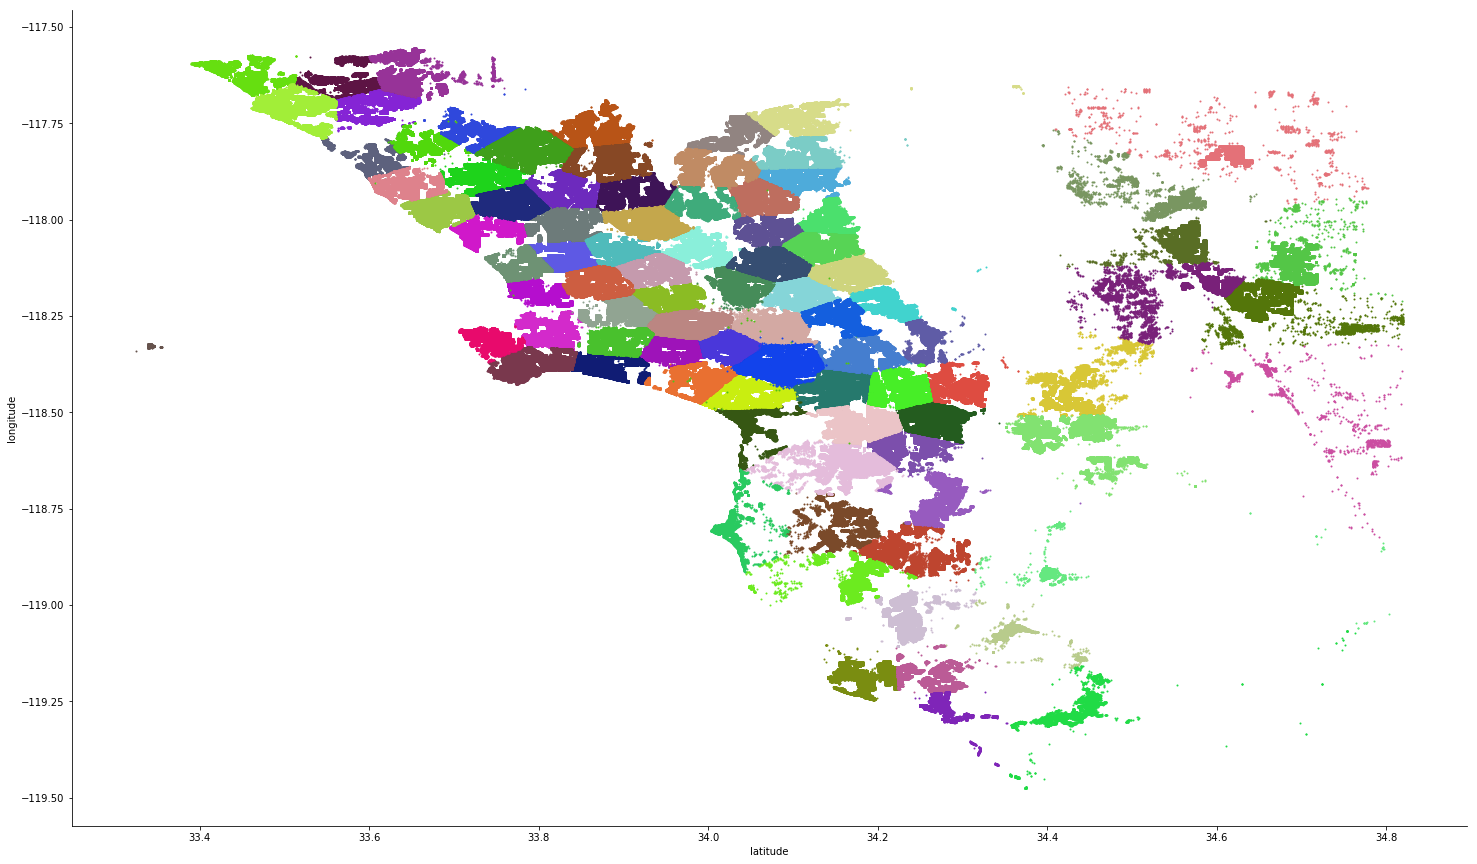

In [65]:
colors_used = []
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(111)
ax.set_axis_bgcolor("white")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)
for i in range(0, num_clusters):
    r1 = random.randint(10,240)
    r2 = random.randint(10,240)
    r3 = random.randint(10,240)
    color2 = '#%02X%02X%02X' % (r2,r3,r1)
    colors_used.append(color2)
    data = DistanceSampleDataEuclidean.loc[ DistanceSampleDataEuclidean['cluster'] == i ] 
    plt.scatter(data['latitude'], data['longitude'],s=1,color=colors_used[i])
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

### For Integration of new dataset, we used crime data 
We obtained the dataset from the follwing website:
https://data.lacity.org/A-Safe-City/Crime-Data-from-2010-to-Present/y8tr-7khq
The data is specific to LosAngeles. It has data of all the crimes that have occured in a pariticular locality from 2010 to present data. It is updated regularly 

In [67]:
crime_data = pd.read_csv('/Users/kiranmayi/Desktop/Sem1/DSF_519/Hw2/Crime_Data_from_2010_to_Present.csv', low_memory=False )

The data has location in the form of (latitude, longitude). Here again we have converted latitude, longitude to ZIP code and created a new column in the dataset with ZIP code

In [14]:
crime_zipcodes = []
search = ZipcodeSearchEngine()
for j in range( 0, crime_data['DR Number'].count()):
    location = crime_data.iloc[j][25]
    try:
        location = location.replace(')','').replace('(','').split(",")
        lat = location[0]
        lon = location[1]
        res = search.by_coordinate(float(lat), float(lon), radius=5, returns=1)
        try:
            crime_zipcodes.append(res[0]['Zipcode'])
        except:
            crime_zipcodes.append(np.nan)
    except:
        crime_zipcodes.append(np.nan)

In [15]:
new_column = pd.DataFrame({'ZIP': zipcode})
crime_data = crime_data.merge(new_column, left_index = True, right_index = True)
mode = crime_data['ZIP'].mode()
crime_data['ZIP'].fillna(mode.real[0], inplace=True)
crime_data.to_csv('crime_data_with_ZIP.csv')

We calculated the number of crimes that have occured at a particular zipcode from 2010 to present.
We used this information and integrated it with our housing dataset. Since both the datasets have ZIP code available, we created a new feature in the housing dataset with crime_counts and populated it with the data from crime_data 

In [68]:
crime_data = pd.read_csv('crime_data_with_ZIP.csv', low_memory=False )
numberofcrimes_byzip = crime_data.groupby('ZIP').size().reset_index(name='crime_counts')
joined_data = pd.merge(DataOfInterest, numberofcrimes_byzip, on='ZIP', how='left')
joined_data.drop(['Unnamed: 0'], axis=1, inplace=True)
joined_data[['latitude']] = joined_data[['latitude']] / 1000000
joined_data[['longitude']] = joined_data[['longitude']] / 1000000
joined_data.to_csv('properties_crime_data_merged.csv')

In [13]:
properties_crime = pd.read_csv('properties_crime_data_merged.csv', low_memory=False)

The process follwed for Data Integration of 'properties_2017' and 'crime_data_with_zip' occurs as follows:

Step 1 - Collection of Crime Data California from Data.gov.

Step 2 - Unmasking the zip code using the 'latitude' and 'longitude' variables. The API used for this purpose is uszipcode.

Step 3 - Once the zip code is unmasked,it is merged with the crime data using zipcode as the identity key. If the zip code is not present for a certain city, it is replaced with NAN value.

Step 4 - The last stage includes writing the zip code for all the property values. It is achieved using filling the NaN values using mode.

Crime occuring in a particular region helps in determining whether the place is suitable for constructing houses or not.If there are more reportings of theft/kidnapping/burglary in a particular zip, it indicates that there are more expensive properties concentrated in that area. Hence, it indicates high prices of properties for that specific area.

The above graph represents how crime is related to the age of the victim. It is clearly seen here that, the victims here are majorly betweeen 10-30 years of age. This can be interpreted as:

1. The crime rate occuring area also has more no of educational schools, given the victims are mostly children.

2. The possible crimes includes kidnapping and burglary.

3. The segment of retired people living in that area is very few,thus we can interpret that, the properties are mainly focussed in lush cities with great apartment costs.

4. More reportings of crime on an area therefore means rich estates with great apartment costs.

  Victim Age  crime_counts
0      10-19       26316.2
1      20-29       34110.6
2      30-39       29729.0
3      40-49       24420.1
4      50-59       18658.5
5      60-69        9038.3
6      70-79        3402.5
7      80-89        1323.6
8      90-99         294.3


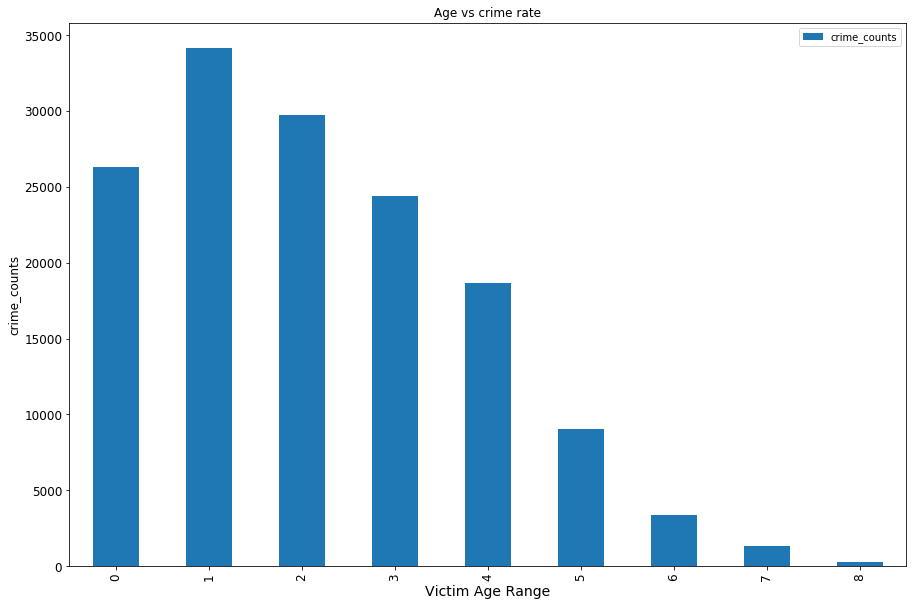

In [69]:
numberofcrimes_byzip = pd.DataFrame(crime_data.groupby('Victim Age').size().reset_index(name='crime_counts'))
crimecount = []
crimecount = numberofcrimes_byzip.groupby(np.arange(len(numberofcrimes_byzip))//10).mean()
bins = [9, 20, 30, 40, 50,60,70,80,90,100]
group_names = ['10-19', '20-29', '30-39', '40-49','50-59','60-69','70-79','80-89','90-99']
crimecount['Victim Age'] = pd.cut(crimecount['Victim Age'], bins, labels=group_names)
print(crimecount)

ax = crimecount[['Victim Age','crime_counts']].plot(kind='bar', title ="Age vs crime rate", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Victim Age Range", fontsize= 14)
ax.set_ylabel("crime_counts", fontsize=12)
plt.show()

### Scoring Function

Here we have ranked all the properties based on the scores calculated for each one of them and then found the top 10 most desirable properties and top 10 least desirable properties. The assumptions made/factors considered for the same are as follows:

Note: 
1.All the features values have been Z-normalized. Power (square or unsquared) signifies the degree of impact that feature will have on the final score. Weight (negative or positive) signifies the directional impact on the score 2.Positive weight will add up to the score to increase the rank of a property while a feature with negative weight sabotages the desirability of the property, hence decreases the score

    1. Unsquared Features with weight >=1 
        a. Bedroom count w=1
        b. Bathroom count w=2
        c. Garage car count (capacity) w=1
        d. Number of stories w=1
        e. Unit count(Duplex/triplex..) w=2
        f. Year Built w=1!
        g. Finished total area w=1.5
        h. Assessed value of the built structure on the parcel w=1
        i. Assessed value of the land area of the parcel w=1
        j. Tax amount for the assessment year w=1
        k. Building Quality w=2
        l. Building Type w=1
        
    2. Unsquared Features with weight <1
        a. Fireplace count w=0.5
        b. Heating system type w=0.5
        
    3. Squared Features
        a. Crime counts w=-1
        




In [11]:
#scoring features with their respective powers and weights
#positive weight means the feature positively impacts the desiribility score of the property and negative weight means the opposite
ScoringFeatures = [['parcelid',1,0],
                 ['bathroomcnt',1,1],
                 ['bedroomcnt',1,2],
                 ['fireplacecnt',1,0.5],
                 ['garagecarcnt',1,1],
                 ['numberofstories',1,1],
                 ['unitcnt',1,2],
                 ['yearbuilt',1,1],
                 ['regionidzip',1,0],
                 ['finishedsquarefeet12',1,0],
                 ['finishedsquarefeet15',1,1.5],
                 ['calculatedfinishedsquarefeet',1,0],
                 ['structuretaxvaluedollarcnt',1,1],
                 ['landtaxvaluedollarcnt',1,1],
                 ['taxamount',1,1],
                 ['latitude',1,0],
                 ['longitude',1,0],
                 ['heatingorsystemtypeid',1,0.5],
                 ['buildingqualitytypeid',1,2],
                 ['buildingclasstypeid',1,1],
                 ['ZIP',1,0],
                 ['crime_counts',2,-1]]

In [26]:
merged_data = deepcopy( properties_crime )

#data cleaning and normalization
for i in ScoringFeatures:
    if i !='parcelid':
        merged_data[i[0]].fillna(0,inplace=True)
        merged_data[i[0]] = (merged_data[i[0]] - merged_data[i[0]].mean())/merged_data[i[0]].std()

#calculating scores on the basis of feature power and weights
for i in merged_data:
    score=0
    for j in ScoringFeatures:
        score=score+((merged_data[j[0]]**[j[1]])*j[2])
        
score_df=pd.DataFrame(score, columns=['Score'])

top10 = properties_crime.join(score_df).sort_values('Score', ascending=False).head(10)
top10.drop(['Unnamed: 0'], inplace=True, axis=1)
bottom10 = properties_crime.join(score_df).sort_values('Score', ascending=False).tail(10)
bottom10.drop(['Unnamed: 0'], inplace=True, axis=1)

#### Top 10 houses

In [27]:
top10

,parcelid,bathroomcnt,bedroomcnt,fireplacecnt,garagecarcnt,numberofstories,unitcnt,yearbuilt,regionidzip,finishedsquarefeet12,...,taxamount,latitude,longitude,heatingorsystemtypeid,buildingqualitytypeid,buildingclasstypeid,threequarterbathnbr,ZIP,crime_counts,Score
342941,11746970,0.0,0.0,1.0,2.0,1.0,464.0,2013.0,95991.0,1764.044992,...,3458861.12,34.061216,-118.290117,2.0,6.0,1.0,1.0,90057,1401,1864.271020
1252741,11984395,0.0,0.0,1.0,2.0,1.0,478.0,2014.0,96017.0,1764.044992,...,3277055.20,34.061321,-118.342823,2.0,6.0,4.0,1.0,90036,2625,1855.950007
462377,12560578,0.0,0.0,1.0,2.0,1.0,951.0,2010.0,96236.0,1764.044992,...,1030259.32,33.769876,-118.196295,2.0,6.0,4.0,1.0,90831,3962,1828.013966
1938915,11467277,0.0,0.0,1.0,2.0,1.0,401.0,2008.0,96026.0,1764.044992,...,1840935.06,33.958979,-118.418970,2.0,6.0,4.0,1.0,90094,5008,1424.564661
148779,11773191,0.0,0.0,1.0,2.0,1.0,421.0,2009.0,95988.0,1764.044992,...,205530.86,34.023487,-118.278532,2.0,6.0,2.0,1.0,90007,2151,1211.018857
1133400,10806423,0.0,0.0,1.0,2.0,1.0,340.0,2014.0,96387.0,1764.044992,...,1757913.92,34.166259,-118.580735,2.0,6.0,4.0,1.0,91364,5511,1133.093482
432636,11525376,0.0,0.0,1.0,2.0,1.0,217.0,2014.0,96072.0,1764.044992,...,1548030.07,33.977478,-118.416391,2.0,6.0,3.0,1.0,90094,5008,1118.592625
924829,167688009,0.0,0.0,1.0,2.0,1.0,1.0,1955.0,96987.0,1764.044992,...,3823175.65,34.050073,-118.259422,2.0,6.0,4.0,1.0,90071,891,1074.931542
2352118,13987714,0.0,0.0,1.0,0.0,2.0,997.0,1971.0,96203.0,1764.044992,...,5489.84,33.808947,-117.989887,2.0,6.0,4.0,1.0,90680,4062,972.027277
2743860,167638131,0.0,0.0,1.0,2.0,1.0,303.0,2014.0,96987.0,1764.044992,...,1556995.55,34.127301,-118.257138,2.0,6.0,4.0,1.0,91205,2385,961.934662


#### Bottom 10 houses

In [28]:
bottom10

,parcelid,bathroomcnt,bedroomcnt,fireplacecnt,garagecarcnt,numberofstories,unitcnt,yearbuilt,regionidzip,finishedsquarefeet12,...,taxamount,latitude,longitude,heatingorsystemtypeid,buildingqualitytypeid,buildingclasstypeid,threequarterbathnbr,ZIP,crime_counts,Score
2788449,12560534,0.0,0.0,1.0,2.0,1.0,1.0,1992.0,96236.0,1764.044992,...,5326.19,33.770018,-118.191633,2.0,6.0,1.0,1.0,90831,3962,-87.661027
2818352,12560536,0.0,0.0,1.0,2.0,1.0,1.0,1992.0,96236.0,1764.044992,...,4499.85,33.770018,-118.191633,2.0,6.0,1.0,1.0,90831,3962,-87.809648
2698962,12560528,0.0,0.0,1.0,2.0,1.0,1.0,1992.0,96236.0,1764.044992,...,4229.77,33.770013,-118.192643,2.0,6.0,1.0,1.0,90831,3962,-88.378614
2758486,11981132,0.0,0.0,1.0,2.0,1.0,1.0,2009.0,96001.0,1764.044992,...,2469.36,34.064208,-118.291651,2.0,6.0,1.0,1.0,90057,1401,-89.453262
2728705,12560530,0.0,0.0,1.0,2.0,1.0,1.0,1992.0,96236.0,1764.044992,...,2838.88,33.770018,-118.191633,2.0,6.0,1.0,1.0,90831,3962,-90.433526
2848095,12560538,0.0,0.0,1.0,2.0,1.0,1.0,1992.0,96236.0,1764.044992,...,1537.09,33.770018,-118.191633,2.0,6.0,1.0,1.0,90831,3962,-91.312170
2713930,12560529,0.0,0.0,1.0,2.0,1.0,1.0,1992.0,96236.0,1764.044992,...,1224.85,33.770018,-118.191633,2.0,6.0,1.0,1.0,90831,3962,-91.434561
2624390,12560523,0.0,0.0,1.0,2.0,1.0,1.0,1992.0,96236.0,1764.044992,...,153.80,33.770018,-118.191633,2.0,6.0,1.0,1.0,90831,3962,-91.820321
2609488,12560522,0.0,0.0,1.0,2.0,1.0,1.0,1992.0,96236.0,1764.044992,...,153.72,33.770013,-118.192643,2.0,6.0,1.0,1.0,90831,3962,-91.865896
2326269,11788103,0.0,0.0,1.0,2.0,1.0,1.0,1926.0,95994.0,1764.044992,...,1589.32,34.048030,-118.249323,2.0,6.0,1.0,1.0,90014,418,-95.590469


### We have applied KMeans clustering on the integrated data which contains crime_counts information.
We clustered for sample set of 1000 entries to see verify how it is integrated.
We were able to create the datapoints on a map and listed the features for each house. Upon hovering on the house, we can see the features for each house.
The map is somehow not visible in the github, but if you compile it, it will be visible in the notebook. For the same reason, I have attached a screenshot of the map. Also I have attached the html map with this homework. Please take a look at files datamap_custom.html and datamap_eucledian.html to see the feature similarity between houses belonging to the same cluster

I tried to gather features of sample of houses belonging to a single cluster:

Cluster A
1. ID:17276347.0 Stories:1.0 Year:1960.0 Tax:1269.22 SqrFt:3280.0
2. ID:17214819.0 Stories:2.0 Year:1987.0 Tax:4477.28 SqrFt:2754.86923259
3. ID:17226677.0 Stories:2.0 Year:1972.0 Tax:1826.76 SqrFt:2754.86923259
4. ID:17202298.0 Stories:2.0 Year:1997.0 Tax:3484.22 SqrFt:2754.86923259

Cluster B
1. ID:17057038.0 Stories:1.0 Year:1954.0 Tax:1610.66 SqrFt:2754.86923259
2. ID:17061147.0 Stories:1.0 Year:1955.0 Tax:6142.48 SqrFt:2754.86923259
3. ID:17101878.0 Stories:1.0 Year:1955.0 Tax:5092.26 SqrFt:2754.86923259
4. ID:17078624.0 Stories:1.0 Year:1927.0 Tax:4316.0 SqrFt:2754.86923259

We can clearly see that cluster B has houses that built before 1960 and most of them have squarefeet 2754, Cluster A has somewhat recent houses and have number of storeys as 2 in most of them and so on.

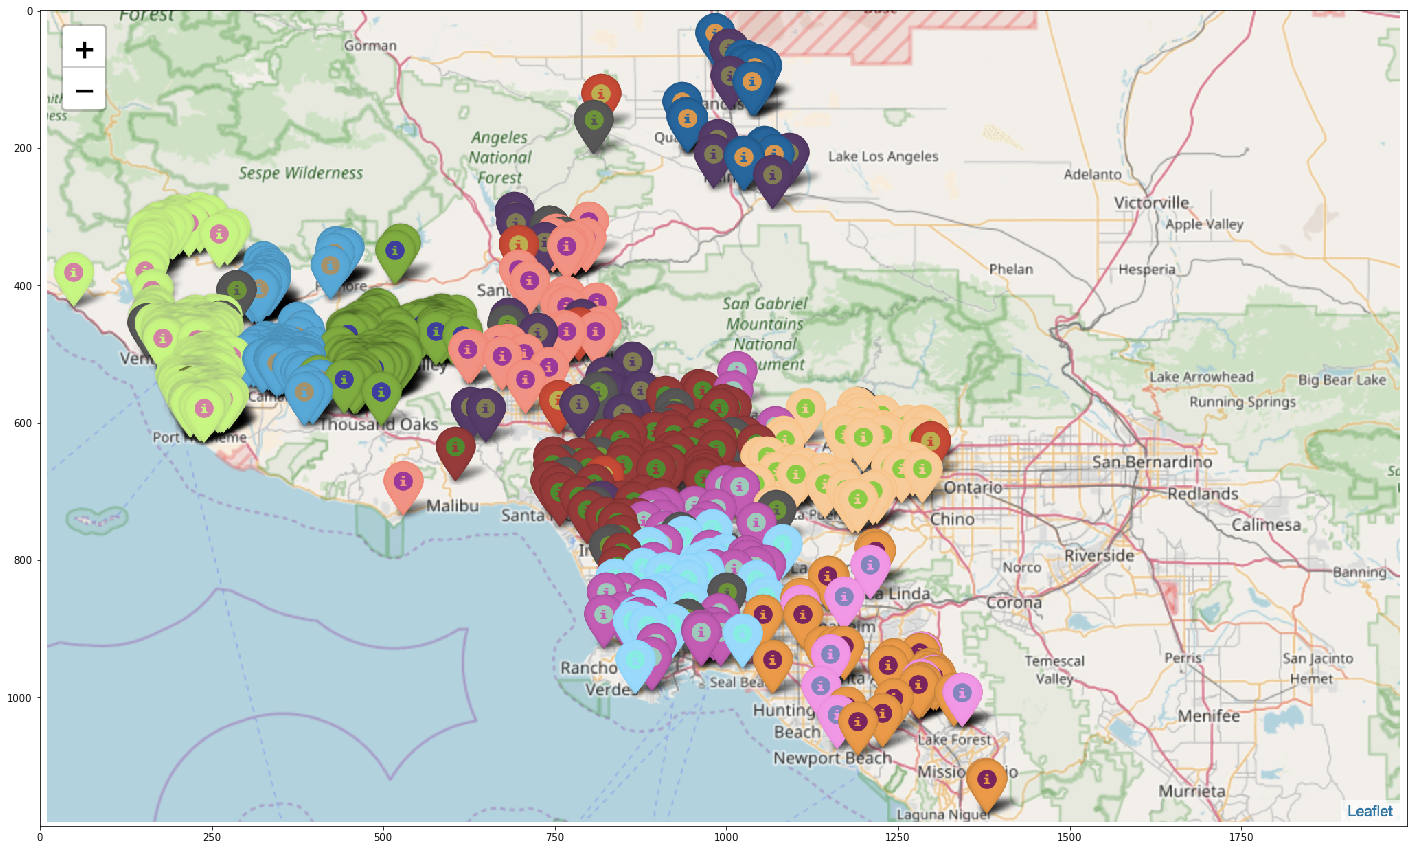

In [22]:
sample_data = properties_crime[FeaturesForDisplay].head(1000)
clusters = 15
kmeans_eucledian = KMeans(n_clusters=clusters, random_state=0,n_init=10,n_jobs=-1).fit(sample_data)
labels = kmeans_eucledian.labels_
sample_data['cluster'] = kmeans_eucledian.labels_

map = folium.Map(location=[sample_data['latitude'].mean(), sample_data['longitude'].mean()], zoom_start=12)

for i in range(0, clusters):
    locations = sample_data.loc[ sample_data['cluster'] == i ] 
    locationlist = locations[['latitude', 'longitude']].values.tolist()
    r1 = random.randint(0,255)
    r2 = random.randint(0,255)
    r3 = random.randint(0,255)
    color2 = '#%02X%02X%02X' % (r2,r3,r1)
    for point in range(0, len(locationlist)):
        pop_string = "ID:" + str( locations.iloc[point]['parcelid'] ) + "  Stories:" + \
                        str( locations.iloc[point]['numberofstories'] ) + "  Year:" + \
                        str( locations.iloc[point]['yearbuilt'] ) + "  Tax:" + \
                        str( locations.iloc[point]['taxamount'] ) + " SqrFt:" + \
                        str( locations.iloc[point]['finishedsquarefeet15'] ) 
        folium.Marker(locationlist[point],popup=pop_string, 
                      icon=folium.Icon(color=colors[i], icon_color=color2)).add_to(map)
map.save(outfile='datamap_eucledian.html')
map

plt.figure(figsize=(25,15))
img=mpimg.imread('Eucledian.jpg')
imgplot = plt.imshow(img)
plt.show()


### Compute pairwise distance using the custom function defined and use the distance matrix to compute clusters
Here again I use the KMeans clustering algorithm, but the distance matrix is precomputed.
The distance matrix is computed using the custom function I have defined above. The function seems to have worked good. I have sampled for 1000 datapoints.
We can see that few of the clusters are distinctly separated based on their location.
Some clusters are spread across different locations. This could happen for many reasons. The following lists them:
1. Houses belonging to the same location may have differnt storeys and units.
2. As some weight is given to the year in which the house is built, it is possible that there are houses which are old and new in a particular region.

Sample houses properties from 3 clusters are shown below:

Cluster A
1. ID:17161984.0 Stories:1.0 Year:1961.0 Tax:1183.08 SqrFt:2754.86923259
2. ID:17158741.0 Stories:1.0 Year:1987.0 Tax:6580.52 SqrFt:2754.86923259
3. ID:17076853.0 Stories:1.0 Year:1926.0 Tax:871.86 SqrFt:2754.86923259
4. ID:17092083.0 Stories:2.0 Year:1986.0 Tax:6384.54 SqrFt:2754.86923259

Cluster B
1. ID:11732547.0 Stories:1.0 Year:1925.0 Tax:3695.84 SqrFt:4320.0
2. ID:11829547.0 Stories:1.0 Year:1959.0 Tax:5716.15 SqrFt:2156.0
3. ID:12366747.0 Stories:1.0 Year:1939.0 Tax:6546.14 SqrFt:2029.0
4. ID:10933547.0 Stories:1.0 Year:1955.0 Tax:6773.34 SqrFt:2754.86923259

Cluster C
1. ID:11229347.0 Stories:1.0 Year:1955.0 Tax:174.21 SqrFt:2754.86923259
2. ID:13119747.0 Stories:1.0 Year:1977.0 Tax:305.16 SqrFt:2754.86923259
3. ID:13119347.0 Stories:1.0 Year:1982.0 Tax:169.02 SqrFt:2754.86923259
4. ID:13118947.0 Stories:1.0 Year:1984.0 Tax:202.01 SqrFt:2754.86923259


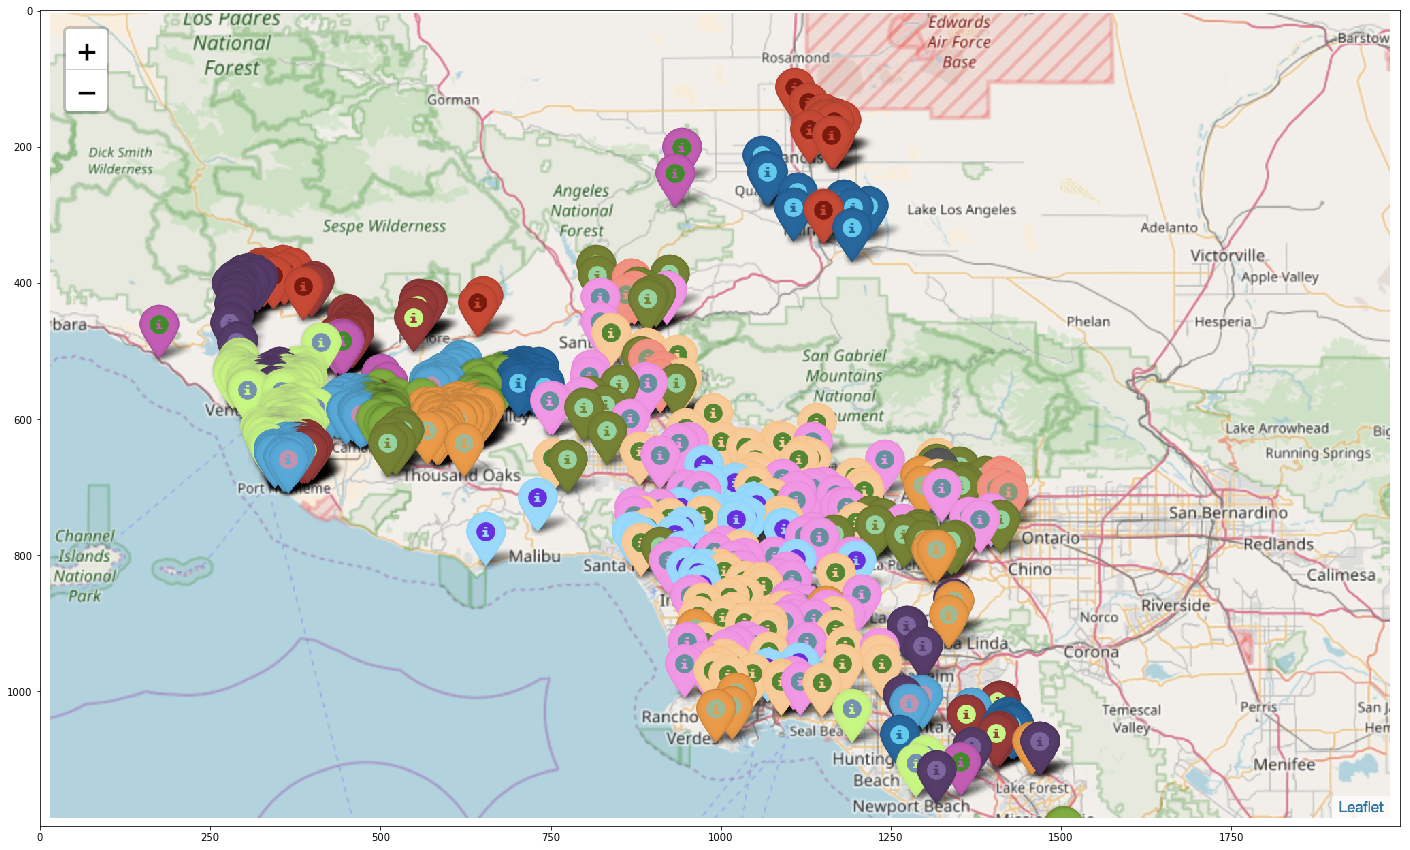

In [85]:
DistanceSampleData = properties_crime[FeaturesForDisplay].head(1000)

distance_custom = []

for i in range(0, 1000 ):
    temp_dist = []
    for j in range(0, 1000):
        temp_dist.append( customePairwise(DistanceSampleData.iloc[i],DistanceSampleData.iloc[j]) )
    distance_custom.append(temp_dist)

clusters = 15
kmeans_eucledian = KMeans(n_clusters=clusters, random_state=0,n_init=10,n_jobs=-1).fit(distance_custom)
labels = kmeans_eucledian.labels_

DistanceSampleData['cluster'] = kmeans_eucledian.labels_

map = folium.Map(location=[DistanceSampleData['latitude'].mean(), DistanceSampleData['longitude'].mean()], zoom_start=12)
for i in range(0, clusters):
    locations = DistanceSampleData.loc[ DistanceSampleData['cluster'] == i ] 
    locationlist = locations[['latitude', 'longitude']].values.tolist()
    r1 = random.randint(0,255)
    r2 = random.randint(0,255)
    r3 = random.randint(0,255)
    color2 = '#%02X%02X%02X' % (r2,r3,r1)
    for point in range(0, len(locationlist)):
        pop_string = "ID:" + str( locations.iloc[point]['parcelid'] ) + "  Stories:" + \
                        str( locations.iloc[point]['numberofstories'] ) + "  Year:" + \
                        str( locations.iloc[point]['yearbuilt'] ) + "  Tax:" + \
                        str( locations.iloc[point]['taxamount'] ) + " SqrFt:" + \
                        str( locations.iloc[point]['finishedsquarefeet15'] ) 
        folium.Marker(locationlist[point],popup=pop_string, 
                      icon=folium.Icon(color=colors[i], icon_color=color2)).add_to(map)
map.save(outfile='datamap_custom.html')
map
plt.figure(figsize=(25,15))
img=mpimg.imread('custom.jpg')
imgplot = plt.imshow(img)
plt.show()

### Loading training data, which we will be using for training our model

In [88]:
logerror_data = pd.read_csv('/Users/kiranmayi/Desktop/Sem1/DSF_519/Hw2/train_2017.csv', low_memory=False)
training_data = pd.merge(properties_crime, logerror_data, on='parcelid', how='inner')
logerror_data['transactiondate'] = pd.to_datetime(logerror_data['transactiondate'])    
logerror_data['transactiondate']=logerror_data['transactiondate'].map(dt.datetime.toordinal)

In [89]:
logerror_data = logerror_data.groupby('parcelid', group_keys=False).apply(lambda x: x.loc[x.logerror.idxmax()])

### For building the model, we will consider 60 clusters and cluster all the datapoints using KMeans clustering

In [90]:
num_clusters = 60

In [32]:
DistanceSampleDataEuclidean = properties_crime[NewTotalFeatures]
kmeans_eucledian = KMeans(n_clusters=num_clusters, random_state=0,n_init=10,n_jobs=-1,max_iter=600).fit(DistanceSampleDataEuclidean[FeaturesForDisplay])
labels = kmeans_eucledian.labels_
DistanceSampleDataEuclidean['cluster'] = kmeans_eucledian.labels_

2985217


In [40]:
DistanceSampleDataEuclidean.to_csv("clusters_and_properties_final.csv")

In [91]:
DistanceSampleDataEuclidean = pd.read_csv("clusters_and_properties_final.csv", low_memory=False)

In [18]:
def normalize(dataFrame):
    for col in dataFrame.keys():
        mean = np.mean(dataFrame[col])
        std = np.std(dataFrame[col])
        if std != 0:
            dataFrame[col] = (dataFrame[col]-mean)/std
    return dataFrame

### Building a Model for the dataset
I have used the follwing procedure for building my model
1. Create 60 clusters using KMeans clustering for all the dataponits in the dataset
2. Extract the houses for each cluster.
3. Extract the datapoints for each cluster for which logerror is given. Divide it into train and test sets
4. Build a model for each cluster
5. I have built 2 models for each cluster, Linear Regression and K-Nearest Neighbours
6. Train the model with the data for which logerror is provided
7. Whichever model is giving the least mean-square error in a given cluster, that model is used for predicting logerrors for that cluster
8. Finally collect the predicted values for each cluster and calculate the mean-square error.
9. Using this model we have got a Mean square error of 0.0210088855757 

Why this model works.
1. Since clustering is already done, we know that, each cluster has houses which have similar features.
2. Since the sale price for the houses is not provided, we can assume that the prediction of the prices belonging to a single cluster might also be similar.
3. Going by the above argument, it is possible that the actual sale of the houses belonging to a single cluster might also be the same. 
4. So the Zestimate i.e log of the differnce of the actual and the predicted price, will also be similar for all the houses belong to a single cluster.
5. Therefore using different model for each cluster will probably yield better prediction of logerror values.
6. This model has worked better than the previous models that we have built in Homework2 in terms of mean-square errors.

In [23]:
mean_mse = 0
final_predictions = []
actual_values = []
for i in range(0, num_clusters):
    data_cluster_i = DistanceSampleDataEuclidean.loc[ DistanceSampleDataEuclidean['cluster'] == i ]
    dataWithError_cluster_i = data_cluster_i.merge(logerror_data, on='parcelid', how='left')
    temp_X = dataWithError_cluster_i.loc[ pd.notnull(dataWithError_cluster_i['logerror'])]
    X = normalize(temp_X[FeaturesForModel])
    y = temp_X['logerror']
    if len(X) == 0:
        continue
    if len(X) < 10:
        X_train, X_test, y_train, y_test = X, X, y, y
    else:
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.05, random_state=30)
    lm = linear_model.LinearRegression()
    model = lm.fit(X_train,y_train)
    predictions = lm.predict(X_test)
    score = lm.score(X_test,y_test)
    mse = (((predictions - y_test.values) ** 2).sum()) / len(predictions)
    actual_values = actual_values + y_test.tolist()

    if len(X) >= 10:
        knn = KNeighborsRegressor(n_neighbors=3)
        knn.fit(X_train, y_train)
        predictions_kn = knn.predict(X_test)
        actual = y_test.values
        mse_kn = (((predictions_kn - actual) ** 2).sum()) / len(predictions_kn)
        score = knn.score(X_test,y_test)
        
    if mse_kn < mse:
        final_predictions = final_predictions + predictions_kn.tolist()
    else:
        final_predictions = final_predictions + predictions.tolist()

mean_mse = (((np.array(final_predictions) - np.array(actual_values)) ** 2).sum()) / len(final_predictions)
print(" Actual MSE: ", mean_mse)

 Actual MSE:  0.0210088855757


### Permutation test
For this test, We have done the following
1. We used the above described model for predicting logerrors.
2. We train the data for for given set of X_train and repsective y_train(logerrors)
3. We predict logerros for X_test data.
4. Now we permute the y_test values and calculate the mean square errors, between the predicted and the permuted values.
5. We do this 500 times and keep all the mean square values.
6. We plotted a histogram, showing the range of mean square error and the number of permutations that resulted in those mean-square erros.
7. The vertical line at 0.021, shows the actual mean square for the correct values.
8. We can clearly see that for a very minute fraction of the permutations, the mean-square error has surprisingly came out to be lower than the actual one.
9. But for a large number of permutations, the error was sufficiently larger than the actual value.
10. We can safely say that out model is simply not guessing any random values, but is actually predicting the logerrors to some extent
11. For 3 permutations out of 500 we got mean square error less than our actual model 

In [44]:

permuted_mse = []
for i in range(0, 500):
    final_predictions = []
    actual_values = []
    for i in range(0, num_clusters):
        data_cluster_i = DistanceSampleDataEuclidean.loc[ DistanceSampleDataEuclidean['cluster'] == i ]
        dataWithError_cluster_i = data_cluster_i.merge(logerror_data, on='parcelid', how='left')
        temp_X = dataWithError_cluster_i.loc[ pd.notnull(dataWithError_cluster_i['logerror'])  ]
        X = temp_X[FeaturesForModel]
        y = temp_X['logerror']
        if len(X) == 0:
            continue
        if len(X) < 10:
            X_train, X_test, y_train, y_test = X, X, y, y
        else:
            X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.05, random_state=30)
        y_test = np.random.permutation(y_test)
        lm = linear_model.LinearRegression()
        model = lm.fit(X_train,y_train)
        predictions = lm.predict(X_test)
        score = lm.score(X_test,y_test)
        mse = (((predictions - y_test) ** 2).sum()) / len(predictions)
        actual_values = actual_values + y_test.tolist()

        if len(X) >= 10:
            knn = KNeighborsRegressor(n_neighbors=3)
            knn.fit(X_train, y_train)
            predictions_kn = knn.predict(X_test)
            actual = y_test
            mse_kn = (((predictions_kn - actual) ** 2).sum()) / len(predictions_kn)
            score = knn.score(X_test,y_test)
            
        if mse_kn < mse:
            final_predictions = final_predictions + predictions_kn.tolist()
        else:
            final_predictions = final_predictions + predictions.tolist()

    permuted_mse.append((((np.array(final_predictions) - np.array(actual_values)) ** 2).sum()) / len(final_predictions))

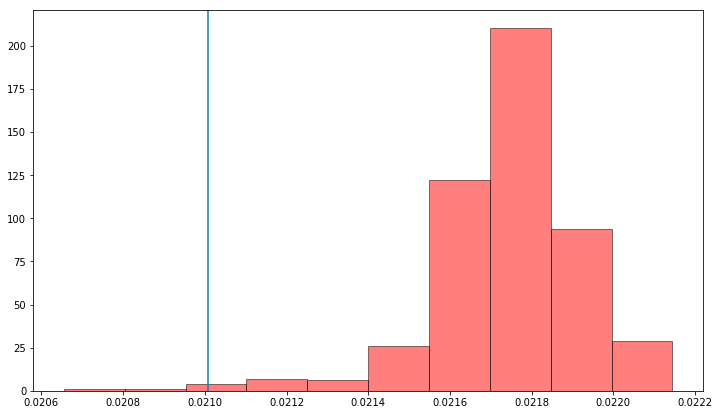

In [45]:
plt.figure(figsize=(12,7))
plt.hist(permuted_mse, 10, facecolor='red', alpha=0.5, histtype='bar', ec='black')
plt.axvline(x=mean_mse)
plt.show()

#### Predicting the values for the parcelid in the submission file.
Here we are predicting just one value. We are not considering transaction date as a feature for our model.
We copy the same predicted values for all the 6 columns in the submission file and submit to kaggle

In [97]:
columns = ['parcelid','201610','201611','201612','201710','201711','201712']
total = 0
parcelids = []
final_predictions =[]

logerror_list = DistanceSampleDataEuclidean.merge(logerror_data, on='parcelid', how='left')
X = logerror_list.loc[ pd.notnull(logerror_list['logerror'])]
lm_general = linear_model.LinearRegression()
lm_general.fit(normalize(X[FeaturesForModel_1]), X['logerror'])

for i in range(0, num_clusters):
    data_cluster_i = DistanceSampleDataEuclidean.loc[ DistanceSampleDataEuclidean['cluster'] == i ]
    dataWithError_cluster_i = data_cluster_i.merge(logerror_data, on='parcelid', how='left')

    temp_X = dataWithError_cluster_i.loc[ pd.notnull(dataWithError_cluster_i['logerror'])]
    temp_predict_X = dataWithError_cluster_i.loc[ pd.isnull(dataWithError_cluster_i['logerror'])]
    
    X = normalize(temp_X[FeaturesForModel_1])
    y = temp_X['logerror']
    
    if len(X) == 0:
        gen_predict = lm_general.predict(normalize(temp_predict_X[FeaturesForModel_1]))
        parcelids = parcelids + temp_predict_X['parcelid'].tolist()
        final_predictions = final_predictions + gen_predict.tolist()
        continue
        
    lm = linear_model.LinearRegression()
    model = lm.fit(X,y)
    predictions_lm = lm.predict(X)
    score = lm.score(X,y)
    mse = (((predictions_lm - y.values) ** 2).sum()) / len(predictions_lm)

    if len(X) >= 10:
        knn = KNeighborsRegressor(n_neighbors=3)
        knn.fit(X, y)
        predictions_kn = knn.predict(X)
        mse_kn = (((predictions_kn - y.values) ** 2).sum()) / len(predictions_kn)  
        
    if mse_kn < mse and len(X) >=10:
        predictions = knn.predict(normalize(temp_predict_X[FeaturesForModel_1]))     
        parcelids = parcelids + temp_predict_X['parcelid'].tolist() + temp_X['parcelid'].tolist()
        final_predictions = final_predictions + predictions.tolist() + predictions_kn.tolist()
    else:
        predictions = lm.predict(normalize(temp_predict_X[FeaturesForModel_1]))
        parcelids = parcelids + temp_predict_X['parcelid'].tolist() + temp_X['parcelid'].tolist()
        final_predictions = final_predictions + predictions.tolist() + predictions_lm.tolist()


In [98]:
predicted_dataframe = pd.DataFrame( { 'parcelid': parcelids, '201610': final_predictions, 
                                     '201611': final_predictions, '201612' : final_predictions, 
                                     '201710' :final_predictions, '201711' : final_predictions, 
                                     '201712' : final_predictions  } )
predicted_dataframe = predicted_dataframe.reindex_axis(['parcelid','201610','201611','201612',
                                                        '201710','201711','201712'], axis=1)
cols = ['parcelid','201610','201611','201612','201710','201711','201712']
predicted_dataframe.to_csv('/Users/kiranmayi/Desktop/Sem1/DSF_519/Hw3/predicted_dataframe6.csv',
                                          columns=cols,index=False)

In [99]:
def fillRandomTransactionDate(frame,days,year,month):
    frame['transactiondate'] = np.random.randint(1,days, size=len(frame['transactiondate']))
    frame['transactiondate'] = frame['transactiondate'].astype(int).astype('str')
    frame['transactiondate'] = year+'-'+month+'-'+frame['transactiondate']
    frame['transactiondate'] = pd.to_datetime(frame['transactiondate'])
    frame['transactiondate'] = frame['transactiondate'].map(dt.datetime.toordinal)
    return frame['transactiondate']

#### Here we are predicting logerrors at the sample submission file for different months
We use transaction date also as a feature in this model.
For each parcel id, we generate 6 differnt points, each for Oct 2010, Nov 2010, Dec 2010, Oct 2017, Nov 2017, Dec 2017. We randomize the transaction date and send it to our model. Now we get 6 prediction values for each parcelid. We fill the submission file with these values

In [ ]:
columns = ['parcelid','201610','201611','201612','201710','201711','201712']
total = 0
parcelids = []

predictions_10_2016 = []
predictions_11_2016 = []
predictions_12_2016 = []
predictions_10_2017 = []
predictions_11_2017 = []
predictions_12_2017 = []

logerror_list = DistanceSampleDataEuclidean.merge(logerror_data, on='parcelid', how='left')
X = logerror_list.loc[ pd.notnull(logerror_list['logerror'])]
lm_general = linear_model.LinearRegression()
lm_general.fit(normalize(X[FeaturesForModel]), X['logerror'])

for i in range(0, num_clusters):
    data_cluster_i = DistanceSampleDataEuclidean.loc[ DistanceSampleDataEuclidean['cluster'] == i ]
    dataWithError_cluster_i = data_cluster_i.merge(logerror_data, on='parcelid', how='left')

    temp_X = dataWithError_cluster_i.loc[ pd.notnull(dataWithError_cluster_i['logerror'])]
    temp_predict_X = dataWithError_cluster_i.loc[ pd.isnull(dataWithError_cluster_i['logerror'])]
    
    X = normalize(temp_X[FeaturesForModel])
    y = temp_X['logerror']
    
    predict_X_10_2016 = deepcopy(temp_predict_X)
    predict_X_11_2016 = deepcopy(temp_predict_X)
    predict_X_12_2016 = deepcopy(temp_predict_X)
    predict_X_10_2017 = deepcopy(temp_predict_X)
    predict_X_11_2017 = deepcopy(temp_predict_X)
    predict_X_12_2017 = deepcopy(temp_predict_X)
    
    predict_X_10_2016['transactiondate'] = 0
    predict_X_10_2016['transactiondate'] = fillRandomTransactionDate(predict_X_10_2016,31,'2016','10')
    predict_X_11_2016['transactiondate'] = 0
    predict_X_11_2016['transactiondate'] = fillRandomTransactionDate(predict_X_11_2016,30,'2016','11')
    predict_X_12_2016['transactiondate'] = 0
    predict_X_12_2016['transactiondate'] = fillRandomTransactionDate(predict_X_12_2016,31,'2016','12')
    predict_X_10_2017['transactiondate'] = 0
    predict_X_10_2017['transactiondate'] = fillRandomTransactionDate(predict_X_10_2017,31,'2017','10')
    predict_X_11_2017['transactiondate'] = 0
    predict_X_11_2017['transactiondate'] = fillRandomTransactionDate(predict_X_11_2017,30,'2017','11')
    predict_X_12_2017['transactiondate'] = 0
    predict_X_12_2017['transactiondate'] = fillRandomTransactionDate(predict_X_12_2017,31,'2017','12')

    
    if len(X) == 0:
        parcelids = parcelids + temp_predict_X['parcelid'].tolist()
        gen_predict = lm_general.predict(normalize(predict_X_10_2016[FeaturesForModel]))
        predictions_10_2016 = predictions_10_2016 + gen_predict.tolist()
        
        gen_predict = lm_general.predict(normalize(predict_X_11_2016[FeaturesForModel]))
        predictions_11_2016 = predictions_11_2016 + gen_predict.tolist()
        
        gen_predict = lm_general.predict(normalize(predict_X_12_2016[FeaturesForModel]))
        predictions_12_2016 = predictions_12_2016 + gen_predict.tolist()
        
        gen_predict = lm_general.predict(normalize(predict_X_10_2017[FeaturesForModel]))
        predictions_10_2017 = predictions_10_2017 + gen_predict.tolist()
        
        gen_predict = lm_general.predict(normalize(predict_X_11_2017[FeaturesForModel]))
        predictions_11_2017 = predictions_11_2017 + gen_predict.tolist()
        
        gen_predict = lm_general.predict(normalize(predict_X_12_2017[FeaturesForModel]))
        predictions_12_2017 = predictions_12_2017 + gen_predict.tolist()
        
        continue
        
    lm = linear_model.LinearRegression()
    model = lm.fit(X,y)
    predictions_lm = lm.predict(X)
    score = lm.score(X,y)
    mse = (((predictions_lm - y.values) ** 2).sum()) / len(predictions_lm)

    if len(X) >= 10:
        knn = KNeighborsRegressor(n_neighbors=3)
        knn.fit(X, y)
        predictions_kn = knn.predict(X)
        mse_kn = (((predictions_kn - y.values) ** 2).sum()) / len(predictions_kn)  
        
    if mse_kn < mse and len(X) >=10:
        parcelids = parcelids + temp_predict_X['parcelid'].tolist() + temp_X['parcelid'].tolist()
        predictions = knn.predict(normalize(predict_X_10_2016[FeaturesForModel]))     
        predictions_10_2016 = predictions_10_2016 + predictions.tolist() + y.tolist()
        
        predictions = knn.predict(normalize(predict_X_11_2016[FeaturesForModel]))
        predictions_11_2016 = predictions_11_2016 + predictions.tolist() + y.tolist()
        
        predictions = knn.predict(normalize(predict_X_12_2016[FeaturesForModel]))
        predictions_12_2016 = predictions_12_2016 + predictions.tolist() + y.tolist()
        
        predictions = knn.predict(normalize(predict_X_10_2017[FeaturesForModel]))
        predictions_10_2017 = predictions_10_2017 + predictions.tolist() + y.tolist()
        
        predictions = knn.predict(normalize(predict_X_11_2017[FeaturesForModel]))
        predictions_11_2017 = predictions_11_2017 + predictions.tolist() + y.tolist()
        
        predictions = knn.predict(normalize(predict_X_12_2017[FeaturesForModel]))
        predictions_12_2017 = predictions_12_2017 + predictions.tolist() + y.tolist()
        
        
    else:
        parcelids = parcelids + temp_predict_X['parcelid'].tolist() + temp_X['parcelid'].tolist()
        
        predictions = lm.predict(normalize(predict_X_10_2016[FeaturesForModel]))     
        predictions_10_2016 = predictions_10_2016 + predictions.tolist() + y.tolist()
        
        predictions = lm.predict(normalize(predict_X_11_2016[FeaturesForModel]))
        predictions_11_2016 = predictions_11_2016 + predictions.tolist() + y.tolist()
        
        predictions = lm.predict(normalize(predict_X_12_2016[FeaturesForModel]))
        predictions_12_2016 = predictions_12_2016 + predictions.tolist() + y.tolist()
        
        predictions = lm.predict(normalize(predict_X_10_2017[FeaturesForModel]))
        predictions_10_2017 = predictions_10_2017 + predictions.tolist() + y.tolist()
        
        predictions = lm.predict(normalize(predict_X_11_2017[FeaturesForModel]))
        predictions_11_2017 = predictions_11_2017 + predictions.tolist() + y.tolist()
        
        predictions = lm.predict(normalize(predict_X_12_2017[FeaturesForModel]))
        predictions_12_2017 = predictions_12_2017 + predictions.tolist() + y.tolist()



In [ ]:
predicted_dataframe = pd.DataFrame( { 'parcelid': parcelids, '201610': predictions_10_2016, 
                                     '201611': predictions_11_2016, '201612' : predictions_12_2016, 
                                     '201710' :predictions_10_2017, '201711' : predictions_11_2017, 
                                     '201712' : predictions_12_2017  } )
predicted_dataframe = predicted_dataframe.reindex_axis(['parcelid','201610','201611','201612',
                                                        '201710','201711','201712'], axis=1)
cols = ['parcelid','201610','201611','201612','201710','201711','201712']
predicted_dataframe.to_csv('/Users/kiranmayi/Desktop/Sem1/DSF_519/Hw3/predicted_dataframe7.csv',
                                          columns=cols,index=False)